## Computational Methods - Homework 5
### Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808 

Calculate the following integral:

$\int_{0}^{4} \sqrt[4]{15 x^3 + 21x^2 + 41x + 3} \cdot e^{-0.5x} dx$

using Monte Carlo Mean Value method

then plot the value of the integral vs number of iterations (check the convergence):

N=[10,100,1000,10000,100000,1000000]

and on the same graph plot the value of the integral using scipy quad method 

*the scipy quad will give a constant horizontal line while MC should show some oscillations*

### Defining Monte_Carlo function

In [1]:
import numpy as np

def Monte_Carlo(f,a,b,N):
    '''
    This function calculates the integral of f between a and b with N points using the Expectation (mean) value method.
    
    Parameters:
    ----------
    f: python function.
    a: int or float. Lower limit of integration.
    b: int or float. Upper limit of integration.
    N: int. Number of points.
    
    Returns:
    ----------
    np.mean(f(x))*(b-a): float. The definite integral.
    '''
    x=np.random.uniform(a,b,N)
    return(np.mean(f(x))*(b-a))

### Exercise function

In [2]:
def f(x):
    return np.exp(-0.5*x)*(15*x**3+21*x**2+41*x+3)**0.25

### Solving the exercise

In [3]:
from scipy.integrate import quad
import matplotlib.pyplot as plt

Iq=quad(f,0,4)[0]  #Integral using quad
IQ=np.asarray([Iq for i in range(0,2)])

N=np.asarray([10,100,1000,10000,100000,1000000])
IMC=np.asarray([Monte_Carlo(f,0,4,i) for i in N])  #Integral using Monte_Carlo

print('Integral using quad: {}'.format(Iq))
print('Integral using Monte_Carlo: {}'.format(IMC))

Integral using quad: 5.767433490695931
Integral using Monte_Carlo: [5.91100482 5.82626795 5.81191319 5.75692376 5.7643219  5.7666295 ]


findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


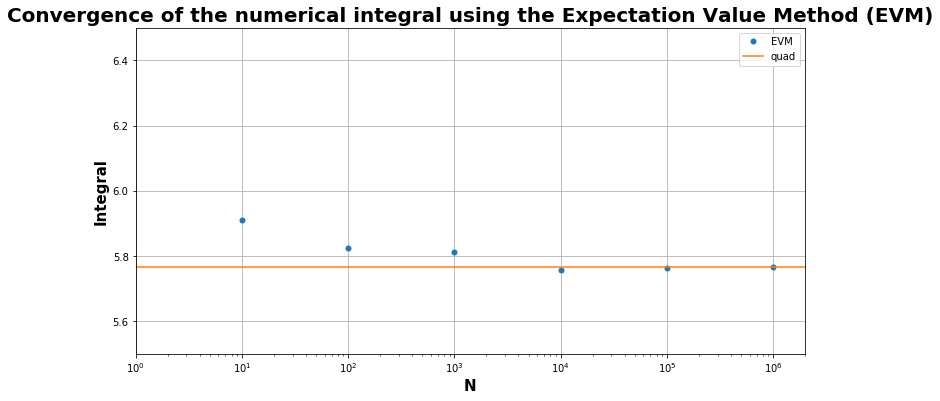

In [4]:
plt.figure(figsize=(12,6))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Convergence of the numerical integral using the Expectation Value Method (EVM)',**font1)

plt.plot(N,IMC,label='EVM',marker='o',linestyle='',markersize=5)
plt.plot(np.linspace(0,10000000,2),IQ,label='quad')
plt.semilogx()
plt.ylim(5.5,6.5)
plt.xlim(1,2000000)
plt.ylabel('Integral',**font2)
plt.xlabel('N',**font2)
plt.legend()
plt.grid()
plt.show()

We can see that from $N=10^5$ the difference between the numerical integral using EVM and using quad is small. Let's calculate the error for each N using the integral of quad as the analytical value:

In [5]:
import pandas as pd

Dic={'N':list(N),'Integral':list(IMC),'Error':[np.abs(i-Iq) for i in IMC]}
df=pd.DataFrame(Dic)
df

,N,Integral,Error
0,10,5.911005,0.143571
1,100,5.826268,0.058834
2,1000,5.811913,0.044480
3,10000,5.756924,0.010510
4,100000,5.764322,0.003112
5,1000000,5.766630,0.000804


From N=100000 the approximation is very good.